In [16]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import csv
import warnings

warnings.filterwarnings('ignore')

In [17]:
#load dataset
dataset = pd.read_csv(r'coords-cleaned-nohands-rmv - Copy.csv')

#to check the data is correct
dataset.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,0,0.455714,0.238344,-0.223043,0.999982,0.461071,0.222943,-0.204575,0.999977,0.463821,...,0.073377,0.963174,0.530793,0.950065,-0.057200,0.990740,0.378521,0.948438,-0.039512,0.993191
1,1,0.455140,0.475834,-0.447122,0.999984,0.461710,0.459694,-0.432202,0.999960,0.465098,...,-0.132675,0.981712,0.529580,0.946013,-0.284150,0.977447,0.377270,0.949453,-0.259748,0.991185
2,0,0.453381,0.165070,-0.171961,0.999987,0.459334,0.148548,-0.153885,0.999981,0.462783,...,0.145975,0.912509,0.529561,0.950289,0.022854,0.986762,0.380586,0.948374,0.015670,0.989430
3,1,0.456494,0.456930,-0.379137,0.999984,0.462974,0.440134,-0.365342,0.999969,0.466089,...,-0.141661,0.981911,0.530155,0.946992,-0.275292,0.979441,0.376479,0.948366,-0.260332,0.992336
4,0,0.452424,0.158574,-0.116190,0.999985,0.457943,0.142219,-0.096161,0.999978,0.461670,...,0.119523,0.918570,0.531195,0.951410,-0.003843,0.983546,0.380131,0.948455,-0.006779,0.988715


In [18]:
# Get dummy variable 
y = dataset['class']

#drop the target data 
x = dataset.drop(["class"], axis=1).values

#seperating the data into test and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [28]:
# Initialize variables
learning_rate = 0.5
iterations = 1000
N = y_train.size

# number of input features
input_size = 132

# number of hidden layers neurons
hidden_size = 607

# number of neurons at the output layer
output_size = 2

results = pd.DataFrame(columns=["mse", "accuracy"])

In [29]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [30]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [32]:
warnings.filterwarnings('ignore')
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(x_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results = results.append({"mse": mse, "accuracy": acc}, ignore_index=True)
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = np.dot(E1 * A2 * (1 - A2), W2.T)

    E2 = dW1 * A1 * (1 - A1)
    dW2 = np.dot(A1.T, E2)

    
    # weight updates
    W2_update = np.dot(A1.T, E1 * A2 * (1 - A2)) / N
    W1_update = np.dot(x_train.T, E2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update


ValueError: operands could not be broadcast together with shapes (607,2) (607,) 

          mse  accuracy
0    0.138560  0.565310
1    0.137409  0.565089
2    0.136291  0.564868
3    0.135208  0.564646
4    0.134162  0.564377
..        ...       ...
995  0.075668  0.800643
996  0.075659  0.800662
997  0.075650  0.800653
998  0.075640  0.800653
999  0.075631  0.800653

[1000 rows x 2 columns]


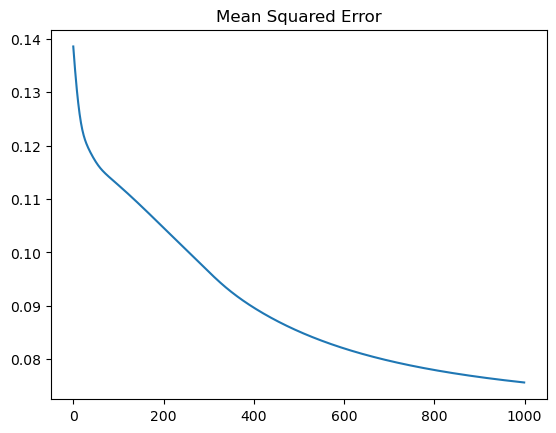

In [15]:
results.mse.plot(title="Mean Squared Error")

print(results)

<AxesSubplot:title={'center':'Accuracy'}>

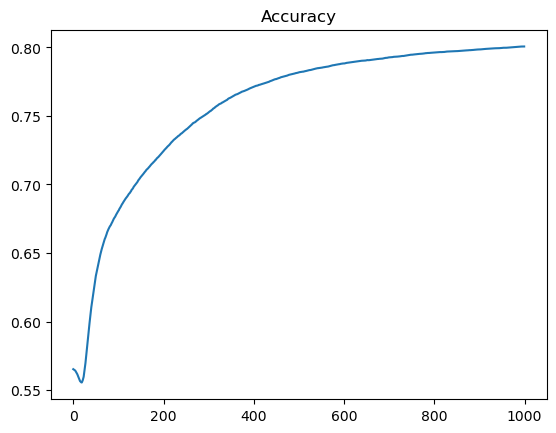

In [16]:
results.accuracy.plot(title="Accuracy")

In [17]:
# feedforward
Z1 = np.dot(x_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8012011087157376
